### A convolutional neural network (CNN) is a type of artificial neural network used primarily for image recognition and processing, due to its ability to recognize patterns in images. A CNN is a powerful tool but requires millions of labelled data points for training.

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_test.shape

(10000, 32, 32, 3)

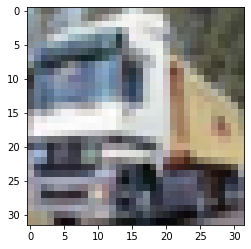

In [14]:
plt.imshow(X_train[1])

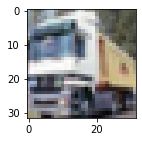

In [15]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [20]:
classes[9]

'truck'

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

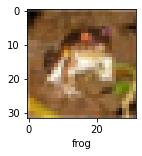

In [28]:
plot_sample(X_train, y_train, 0)

In [26]:
classes[6]

'frog'

In [30]:
# Normalization
X_train = X_train/255

In [31]:
X_test = X_test/255

In [33]:
# this will perform poorly on this dataset
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [34]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [35]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8133 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6238 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5392 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4825 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4287 - accuracy: 0.4973


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.70      0.53      1000
           1       0.59      0.64      0.61      1000
           2       0.36      0.40      0.38      1000
           3       0.35      0.40      0.37      1000
           4       0.48      0.31      0.38      1000
           5       0.48      0.28      0.36      1000
           6       0.45      0.67      0.54      1000
           7       0.81      0.28      0.42      1000
           8       0.66      0.56      0.61      1000
           9       0.53      0.58      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



### improve performance 
### Questions: Conv2D, MaxPooling2D, softmax, sparese_categorical_crossentropy, filters

In [38]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(), # cnn network can figure out dimensions; cnn will do most of the work, no need for many layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [39]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [40]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4713 - accuracy: 0.4710
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1174 - accuracy: 0.6076
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9900 - accuracy: 0.6558
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9104 - accuracy: 0.6840
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8485 - accuracy: 0.7068
Epoch 6/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.7949 - accuracy: 0.7239
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7482 - accuracy: 0.7409
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7070 - accuracy: 0.7553
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6728 - accuracy: 0.7656
Epoch 10/10
1563/1563 [==============================] - 34s 22m

In [41]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8955 - accuracy: 0.6971


[0.8955402374267578, 0.6970999836921692]

In [42]:
y_test = y_test.reshape(-1,)

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

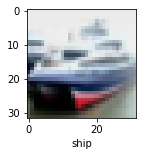

In [44]:
plot_sample(X_test, y_test, 1)

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.9703309e-03, 7.8268975e-05, 5.3226426e-03, 7.4311149e-01,
        1.4625177e-04, 8.9816518e-02, 3.0390869e-03, 2.6043010e-04,
        1.5186062e-01, 3.9437023e-04],
       [7.5981198e-03, 2.4940290e-03, 6.0035004e-06, 8.8277083e-09,
        1.3064237e-08, 9.5032739e-11, 1.0111563e-08, 3.6401810e-12,
        9.8989826e-01, 3.5989221e-06],
       [1.4224122e-01, 1.7827040e-01, 1.8419602e-03, 5.8658532e-04,
        1.1027657e-04, 8.5963205e-05, 2.8844501e-05, 4.0784165e-05,
        6.7369717e-01, 3.0968101e-03],
       [8.8161933e-01, 6.0625435e-03, 1.8753676e-02, 1.0718225e-02,
        5.2921980e-04, 1.0289416e-04, 8.2562276e-04, 5.1018398e-04,
        7.2738610e-02, 8.1397034e-03],
       [4.3184350e-06, 1.5985253e-04, 4.0550850e-02, 1.0143733e-02,
        6.8867218e-01, 1.2471216e-03, 2.5911528e-01, 3.1454474e-05,
        7.1330163e-05, 3.7502653e-06]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

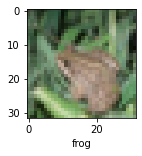

In [53]:
# try for all 5 values
# Actual: array([3, 8, 8, 0, 6]
# Predicted:    [3, 8, 8, 0, 4]
plot_sample(X_test, y_test, 4)

In [54]:
classes[y_classes[4]]

'deer'